In [95]:
import os
import cv2
import json
from pathlib import Path
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [96]:
ROOT_DIR = '../Virtual_Microscope_Apollo_Images/altered_img_data/img_data_max_pixel_values_circular_sharpened'
ROOT_DIR_mixed_sources = '../Virtual_Microscope_Other_Images/altered_img_data/img_data_max_pixel_values_circular'
JSON_DIR = '../Virtual_Microscope_Apollo_Images/olivine_testset_polygon_label_files'

In [ ]:
def show(img):
    #Show the image with matplotlib
    plt.imshow(img)
    plt.show()

In [85]:
def get_img_and_draw(ROOT_DIR, img_name):
    img_path = os.path.join(ROOT_DIR, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img = cv2.resize(img, IMAGE_SIZE)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img)
    return img, draw

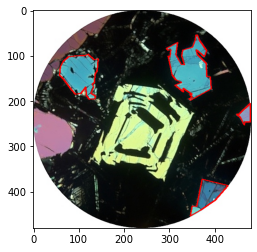

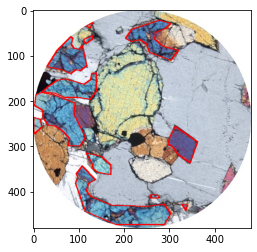

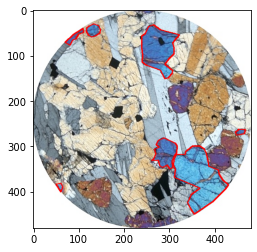

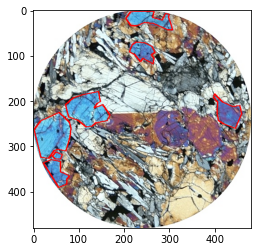

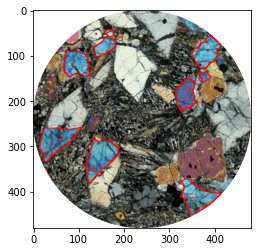

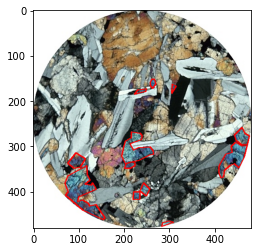

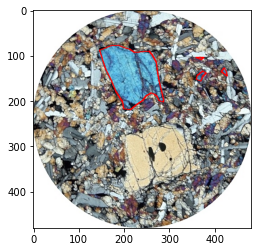

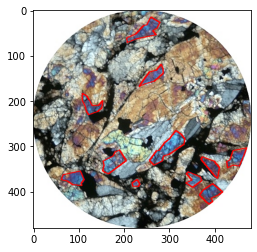

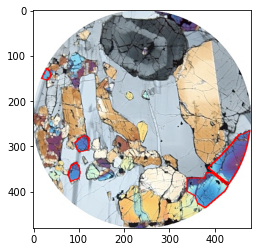

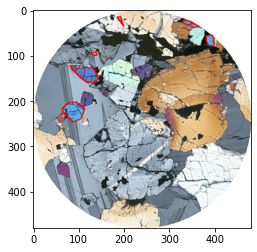

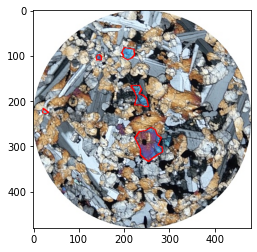

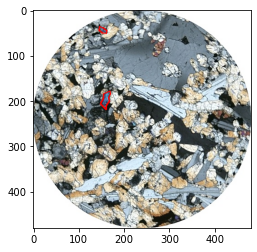

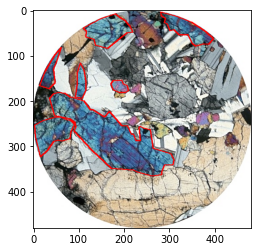

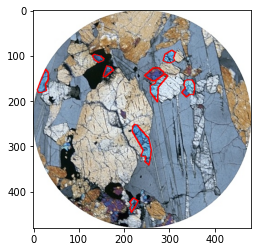

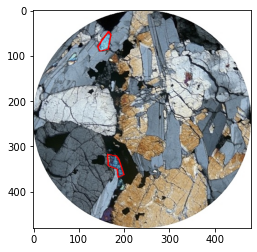

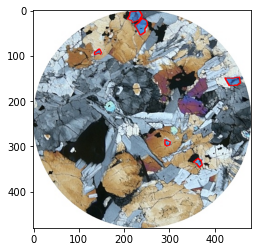

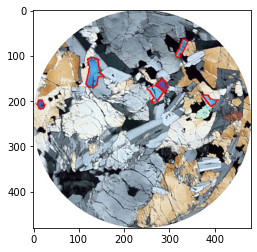

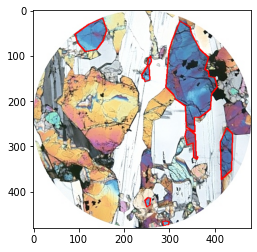

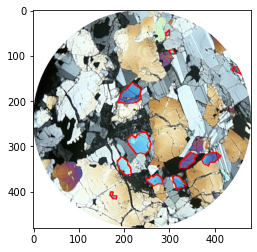

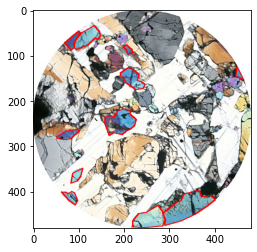

In [91]:
json_files = os.listdir(JSON_DIR)

for json_file_name in json_files:
    specimen = json_file_name.split('_')[0]
    subsample = json_file_name.split('_')[1]
    img_name = f'{specimen}_{subsample}_xpl_max.jpg'
    
    img, draw = get_img_and_draw(ROOT_DIR, img_name)
    
    # Opening JSON file
    json_path = os.path.join(JSON_DIR, json_file_name)
    with open(json_path) as json_file:
        json_data = json.load(json_file)

    # iterate over all olivine polygons
    num_of_polygons = len(json_data['shapes'])
    for i in range(num_of_polygons): # iterate over different olivine crystals
        polygon_coordinates = [tuple(x) for x in json_data['shapes'][i]['points']]
        polygon_coordinates.append(polygon_coordinates[0]) # polygon needs to be closed
        for j in range(len(polygon_coordinates)-1): # iterate over coordinates of single crystal
            draw.line(polygon_coordinates[j] + polygon_coordinates[j+1], fill='red', width=3)
    show(img)